<a href="https://colab.research.google.com/github/1306minyoung/data/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SGDClassfier

In [2]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


train.csv의 누락된 데이터 확인

In [5]:
print(train.isnull().any())
print(train.info())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
mem

test.csv의 누락된 데이터 확인

In [6]:
print(test.isnull().any())
print(test.info())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


결측치(NaN값)를 다음과 같이 해결함
1. Age, Fare의 경우 평균값으로 채움
2. Cabin, Embarked의 경우 최빈값으로 채움

In [ ]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())
train["Cabin"] = train["Cabin"].fillna(train["Cabin"].mode()[0])
test["Cabin"] = test["Cabin"].fillna(test["Cabin"].mode()[0])
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

train과 test 속 영어로 된 값들을 상수로 변경

In [ ]:
train["Sex"] = [1 if i == "male" else 0 for i in train["Sex"]]
test["Sex"] = [1 if i == "male" else 0 for i in test["Sex"]]
train["Embarked"] = [0 if i == "S" else i for i in train["Embarked"]]
train["Embarked"] = [1 if i == "C" else i for i in train["Embarked"]]
train["Embarked"] = [2 if i == "Q" else i for i in train["Embarked"]]
test["Embarked"] = [0 if i == "S" else i for i in test["Embarked"]]
test["Embarked"] = [1 if i == "C" else i for i in test["Embarked"]]
test["Embarked"] = [2 if i == "Q" else i for i in test["Embarked"]]

Survived열을 제외한 나머지 5개의 데이터를 입력데이터로 사용. Survived는 타깃 데이터로 사용한다.

In [ ]:
titan_input = train[["Pclass","Age","Sex","Fare","Embarked"]].to_numpy()

In [ ]:
titan_test = test[["Pclass","Age","Sex","Fare","Embarked"]].to_numpy()
titan_target = train["Survived"].to_numpy()

데이터를 훈련 세트 테스트세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(titan_input, titan_target, random_state = 202135975)

훈련세트, 테스트세트 특성을 표준화 처리

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(titan_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

'loss = 'log_loss'로 지정해 로지스틱 손실 함수를 지정

해당 모델의 하이퍼 파라미터인 max_iter를 통해 수행할 에포크 횟수 지정 (10번)

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=10, random_state = 202135975)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7604790419161677
0.7668161434977578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


추가로 한번 더 훈련(11번)

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.5883233532934131
0.5695067264573991


점수가 확 떨어졌음에 의문이 생겨 추가 훈련 실행 & 각 훈련 횟수마다의 점수를 그래프에 나타내봄

In [ ]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 202135975)
train_score = []#훈련점수를 담을 리스트 생성
test_score = []#테스트점수를 담을 리스트 생성
classes = np.unique(titan_target)

500번의 에포크동안 기록한 테스트세트 훈련세트의 점수를 그래프로 나타내보기

In [ ]:
for _ in range(0, 500):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


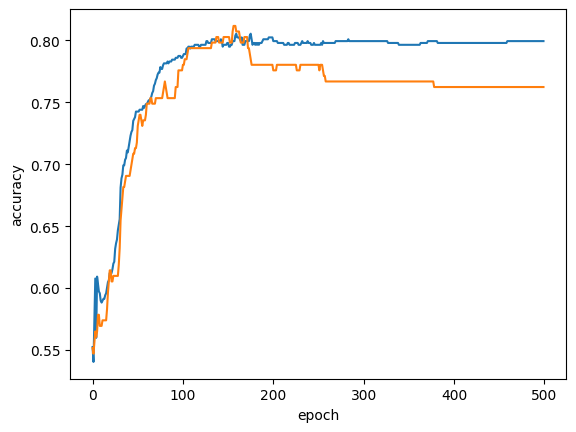

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

그래프를 보면 11번째에 왜 갑자기 떨어졌는지 확인 가능하다. 또한 이 모델의 경우 100번째 에포크가 적절한 반복 횟수로 보인다.

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol = None, random_state=202135975)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8098802395209581
0.7892376681614349


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


test.csv의 survived 값들을 예측해보았다.

sklearn의 make_pipeline()을 사용해 학습한 후 predict()를 통해 예측해본 결과는 다음과 같다.

In [ ]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=None,random_state=202135975))
model.fit(titan_input, titan_target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(random_state=202135975, tol=None))])

In [ ]:
predict = model.predict(titan_test)
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

위의 결과에 따라 gender_submission.csv파일의 survived 값들을 test.csv의 survived값으로 수정할 수 있다.

In [ ]:
gender_sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")
gender_sub["Survived"] = predict
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#결정트리

In [ ]:
data = train[["Pclass","Age","Sex","Fare","Embarked"]].to_numpy()
target = train["Survived"].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split = train_test_split(data, target, test_size = 0.2, random_state=202135975)
#test_size를 0.2로 설정하여 20%정도만 테스트 세트로 나눔(훈련할 데이터 비중을 늘리기 위해)

In [ ]:
print(train_input.shape, test_input.shape)

(712, 5) (179, 5)


훈련세트를 전처리해보는 과정은 아래와 같다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

로지스틱 회귀를 이용하여 훈련해 점수를 내보았다. 점수가 둘 다 높지 않다는 것을 알 수 있다.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.800561797752809
0.7486033519553073


로지스틱 회귀가 학습한 계수와 절편은 다음과 같다.

In [ ]:
print(lr.coef_, lr.intercept_)

[[-1.01146369 -0.48906835 -1.24357185  0.00219059  0.17919933]] [-0.72524185]


결정트리 모델을 훈련해보았다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 202135975)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9831460674157303
0.7430167597765364


그림으로 출력하면 아래와 같다.

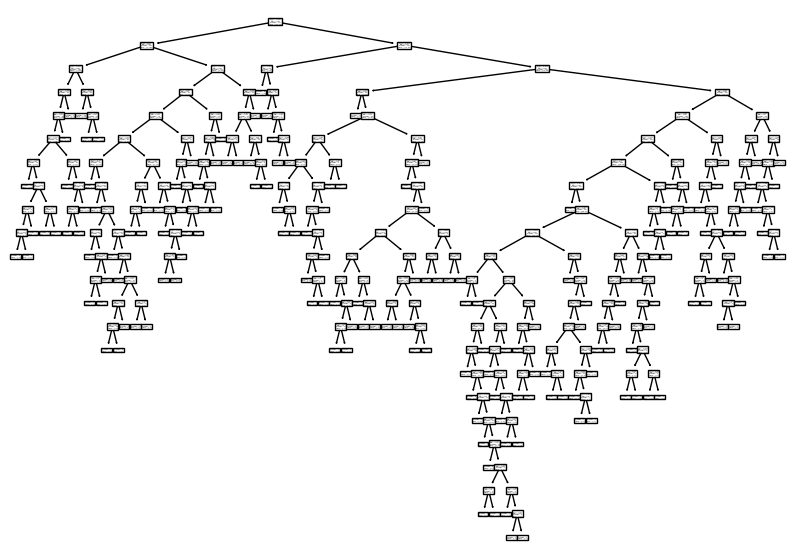

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

max_depth매개변수를 3으로 설정해 모델 생성

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=202135975)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8286516853932584
0.7932960893854749


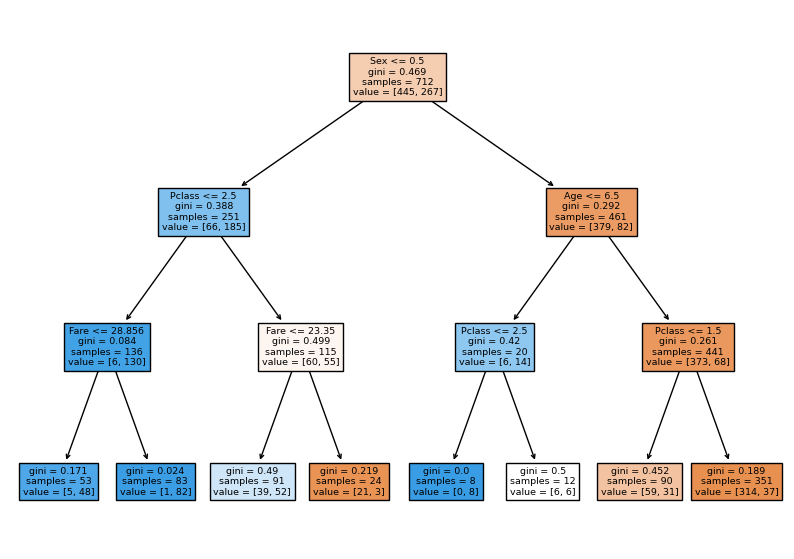

In [ ]:
plt.figure(figsize=((10,7)))
plot_tree(dt, filled=True, feature_names=["Pclass","Age","Sex","Fare","Embarked"])
plt.show()

max_depth매개변수 값을 변경해가며 최적의 점수를 배출하는 max_iter을 찾아보겠다.

In [ ]:
train_score = []
test_score = []
max_depth = range(1,30)
for n in max_depth:
  dt = DecisionTreeClassifier(max_depth=n, random_state=202135975)
  dt.fit(train_input, train_target)
  train_score.append(dt.score(train_input, train_target))
  test_score.append(dt.score(test_input, test_target))

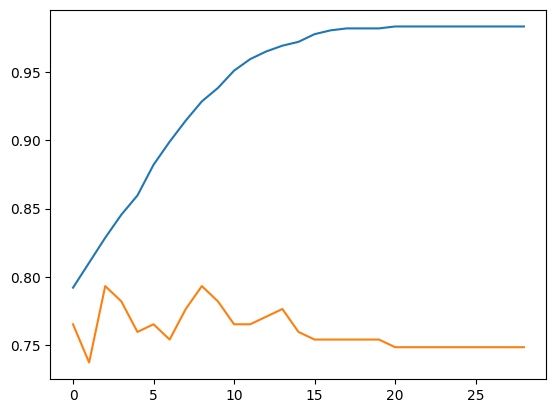

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

그래프를 통해 대강 5-10사이가 적절하다는 것을 알았다. 더 자세히 알기위해 상세한 정보를 출력해보았다.

In [ ]:
df = pd.DataFrame({'Train':train_score, 'Test':test_score}, index= max_depth)
df

,Train,Test
1,0.792135,0.765363
2,0.810393,0.737430
3,0.828652,0.793296
4,0.845506,0.782123
5,0.859551,0.759777
6,0.882022,0.765363
7,0.898876,0.754190
8,0.914326,0.776536
9,0.928371,0.793296
10,0.938202,0.782123


 ==> max_depth = 9일 때 점수가 제일 최적임을 알 수 있다.

#랜덤 포레스트

n_jobs의 값을 -1로 지정해 최대한 병렬로 교차검증 수행.

return_train_score 매개변수를 True로 지정하여 검증점수뿐만 아니라 훈련세트에 대한 점수도 반환(과대적합 파악하기 쉬워짐)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 202135975)

In [ ]:
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9852526747448586 0.8216290751502019


특성 중요도를 계산해 출력

In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.10560751 0.28444122 0.27418465 0.3002076  0.03555902]


자체적으로 모델을 평가해보기
(OOB 샘플 : 부트스트랩 샘플에 포함되지 않고 남는 샘플)

해당 점수를 얻기 위해서는 oob_score를 True로 설정해두어야 한다.

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs = -1, random_state = 202135975)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8314606741573034


gridsearchCV를 이용해 최적의 하이퍼 파라미터를 뽑아보았다.

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
	'max_depth':[3, 6, 8, 10, 12], #트리의 최대깊이
	'min_samples_leaf':[3, 6, 8, 12,  ], #리프노드가 되기 위한 최소 샘플의 개수
	'min_samples_split':[8, 16, 20 ] #노드를 나누기 위한 최소 샘플 수
}

grid_cv = GridSearchCV(rf, param_grid = params, cv=2, n_jobs = -1)
grid_cv.fit(train_input, train_target)

print('최적의 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8}
최고 예측 정확도:0.8104


#히스토그램 기반 그레이디언트 부스팅

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202135975)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.946278790121173 0.8356544863587118


permutation_importance가 반환하는 객체는 반복해 얻은 특성 중요도, 평균, 표준편차를 담고 있다.

In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=202135975, n_jobs=-1)
print(result.importances_mean)

[0.12977528 0.12977528 0.21699438 0.13117978 0.03356742]


테스트세트에서 특성중요도를 계산하면 다음과 같다.

In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=202135975, n_jobs=-1)
print(result.importances_mean)

[0.08268156 0.04581006 0.17653631 0.03854749 0.00111732]


HistGradientBoostingClassifier를 사용해 테스트 세트에서의 성능을 확인하면 다음과 같다.

In [ ]:
hgb.score(test_input, test_target)

0.7932960893854749

XGBoost 라이브러리를 활용해 교차 검증 점수 확인

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=202135975)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9743686985477755 0.8300403821530582


LightGBM 라이브러리를 활용해 테스트

In [ ]:
from lightgbm import LGBMClassifier
lgb= LGBMClassifier(random_state=202135975)
scores=cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9462794067770481 0.8258150300403821


 HistGradientBoostingClassifier는 트리의 개수를 지정하는데 부스팅 반복 횟수를 지정하는 max_iter를 사용한다. 따라서 성능을 높이기 위해서는 max_iter 매개변수를 테스트해보면 된다.

최적의 점수를 찾기 위해 max_iter값을 바꾸어 가며 점수를 확인해 보았다.

In [ ]:
import matplotlib.pyplot as plt
score_train = []
score_test = []
range1 = range(10, 600, 10)
tr_s = np.mean(scores['train_score'])
te_s = np.mean(scores['test_score'])
for n in range1 :
  hgb = HistGradientBoostingClassifier(random_state=42, max_iter = n)
  scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
  print(n, np.mean(scores['train_score']), np.mean(scores['test_score']))

10 0.8374303949680881 0.8131882202304738
20 0.8676261832084606 0.8272333300502315
30 0.8781642154595627 0.8300600807643062
40 0.8922036197699873 0.837082635674185
50 0.9080060432275768 0.8384910863784103
60 0.9199438843153578 0.837082635674185
70 0.9269675947337589 0.8356544863587118
80 0.9322338359078716 0.8272136314389835
90 0.9378534208984677 0.832837584950261
100 0.946278790121173 0.8356544863587118
110 0.9504905497487128 0.8314488328572835
120 0.9575154934788641 0.8244164286417808
130 0.9638355995436747 0.8272333300502315
140 0.9673462214411248 0.821609376538954
150 0.9705059661455925 0.8230178272431795
160 0.9726118459593623 0.821609376538954
170 0.9743674652360251 0.8202107751403526
180 0.9757715906638301 0.8188121737417513
190 0.9764745783615453 0.821609376538954
200 0.9782308142940831 0.8202009258347287
210 0.979986433570746 0.8215995272333301
220 0.979986433570746 0.817393873731902
230 0.9803379274196035 0.817393873731902
240 0.9806888046125859 0.8159854230276766
250 0.981391

==> 10부터 590까지 10씩 max_iter 값을 올리며 점수를 확인한 결과 max_iter=50일때가 가장 최적임을 알 수 있었다.